# Navigation

---

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import tensorflow as tf
import torch
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)
print(tf.__version__)
print(np.__version__)

0.4.0
1.13.1
1.15.3


We first gonna load the gym from open ai gym to setup a simple benchmark study.

In [2]:
import gym

env = gym.make('LunarLander-v2')

seed = 0
env.seed(seed)
action_size = env.action_space.n
state_size = env.observation_space.shape[0]

print('State shape: ', state_size)
print('Number of actions: ', action_size)

State shape:  8
Number of actions:  4


In [3]:
import inspect

def get_var_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    name = [k for k, v in callers_local_vars if v is var]
    return name[0]

Episode 100	Average Score: -175.18
Episode 200	Average Score: -84.880
Episode 300	Average Score: -14.26
Episode 400	Average Score: 4.5751
Episode 500	Average Score: 24.52


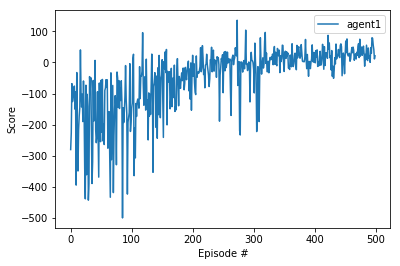

In [4]:
from models.dqn_agent import DQNAgent

agent1 = DQNAgent(state_size, action_size, seed, network_type='linear')
agent2 = DQNAgent(state_size, action_size, seed, network_type='lstm')

from training.q_learning import dqn
n_episodes = 500
max_t = 200

scores1 = dqn(agent1, env, n_episodes, max_t)
#scores2 = dqn(agent2, env, n_episodes, max_t)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores1)), scores1, label=get_var_name(agent1))
#plt.plot(np.arange(len(scores2)), scores2, label=get_var_name(agent2))
plt.legend()
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

#### 2. Load the model

Here we select two models, a critrium to benchmark them and launch a dummmy training session. After, we plot the training results. 

### 3. Load the Unity environment

In [2]:
from unityagents import UnityEnvironment
import numpy as np

If working from MacOS use cell below: 

In [7]:
env = UnityEnvironment(file_name="Banana.app")

UnityEnvironmentException: Couldn't launch the Banana environment. Provided filename does not match any environments.

If working from Linux execute cell below:

In [3]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. Load the baseline

The simplest baseline is a Q-learning agent that stores all q values in a table

In [14]:
from agent import Agent
agent = Agent()
#assert(agent.nA == action_size)
print(len(agent.Q[0].items()))

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [ ]:
env_info = env.reset(train_mode=True)[brain_name]